# TMDB Movie Analysis: Uncovering Insights on Popularity, Box Office Success, and More!

## Introduction
In this analysis, we aim to understand what factors drive a movie's popularity and profitability by analyzing the TMDB movie dataset. This dataset includes **10,867 movies** and offers insights on **budget, revenue, genres, popularity, cast, director**, and more. By answering the following key questions, we hope to uncover patterns that distinguish successful films from others.

### Analysis Questions
1. **Does a Higher Budget Lead to Greater Revenue and Profit?**
2. **Which Genres are Most Associated with High Popularity?**
3. **Which production companies Has Produced the Highest Revenue Movies?**
4. **Which Actor is Associated with Higher Popularity and Profit?**
5. **Which Year Produced the Highest Grossing Movies?**

---

## Step 1: Importing Necessary Libraries and Loading the Dataset

To begin, let's import the libraries we'll use for data manipulation, visualization, and analysis and load the dataset into a DataFrame and take an initial look at the data.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visual style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]

df = pd.read_csv("data/tmdb_5000_movies.csv")

# Display the first few rows of the dataset
df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


## Step 2: Data Overview and Cleaning
Let's check for missing values and understand the basic structure of our data to identify any necessary cleaning steps.

In [25]:
# Display dataset summary to check data types and missing values
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64


**Cleaning Steps:**
1. We'll drop columns like `homepage`, `tagline`, and `keywords` that aren't relevant to our analysis.
2. Handle missing values in critical columns like `budget`, `revenue`, and `release_date`.
3. Convert data types where needed, such as changing `release_date` to datetime and budget/revenue columns to numeric types.


In [26]:
# Drop columns not required for the analysis
df = df.drop(columns=['homepage', 'tagline', 'keywords', 'overview'])

# Drop rows with missing budget, revenue, and release date
df = df.dropna(subset=['budget', 'revenue', 'release_date'])

# Convert columns to appropriate data types
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['release_date'] = pd.to_datetime(df['release_date'])

# Calculate a new column 'profit' as the difference between revenue and budget
df['profit'] = df['revenue'] - df['budget']

## Step 3: Analysis and Visualization

### Question 1: Does a Higher Budget Lead to Greater Revenue and Profit?

To answer this question, we'll visualize the relationship between a movie's budget and its revenue, and calculate the correlation between the two.

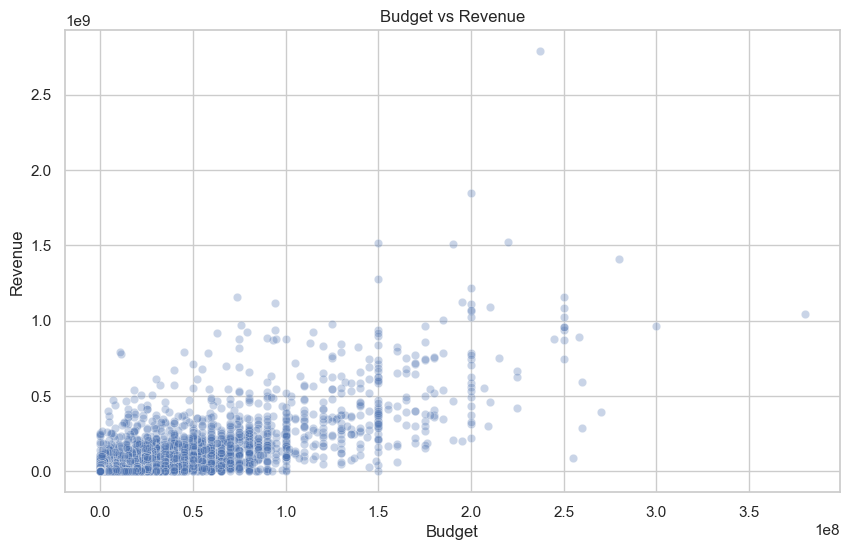

Correlation between Budget and Revenue: 0.73


In [27]:
# Scatter plot of Budget vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='revenue', alpha=0.3)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

# Calculate and display correlation between budget and revenue
budget_revenue_corr = df['budget'].corr(df['revenue'])
print(f"Correlation between Budget and Revenue: {budget_revenue_corr:.2f}")

We can further explore whether a larger budget translates to higher profit.

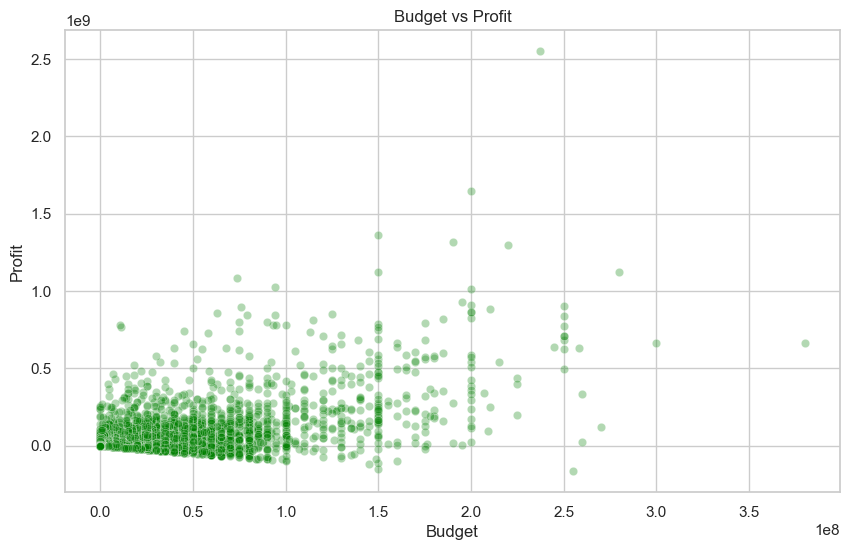

In [28]:
# Scatter plot of Budget vs Profit
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='budget', y='profit', alpha=0.3, color='green')
plt.title('Budget vs Profit')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.show()

### Question 2: Which Genres are Most Associated with High Popularity?

By splitting the genre information, we can examine which genres appear most frequently and which are associated with higher popularity.

/var/folders/8m/_fv4209s7qz680w_6grdnb1r0000gp/T/ipykernel_88263/2343523982.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette="viridis")


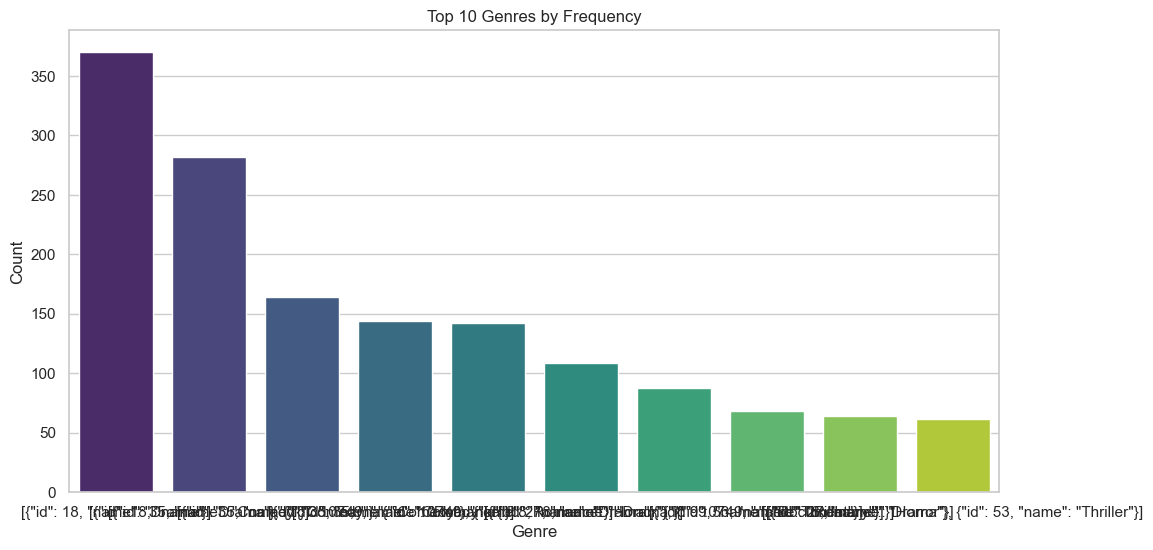

/var/folders/8m/_fv4209s7qz680w_6grdnb1r0000gp/T/ipykernel_88263/2343523982.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genre_popularity.index[:10], y=top_genre_popularity.values[:10], palette="viridis")


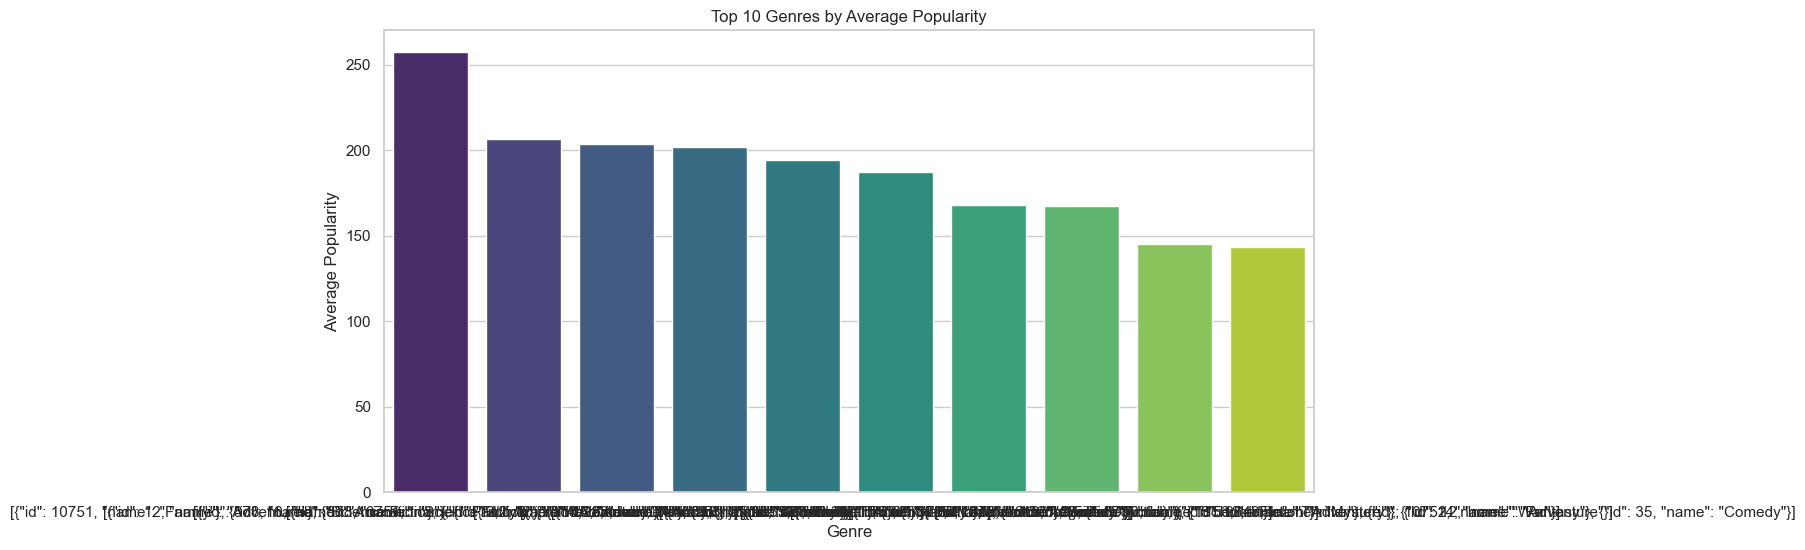

In [29]:
# Split genres column and analyze each genre's popularity
from collections import Counter

# Count occurrences of each genre
all_genres = df['genres'].dropna().str.split('|').sum()
genre_counts = pd.Series(Counter(all_genres)).sort_values(ascending=False)

# Plot top genres by count
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette="viridis")
plt.title('Top 10 Genres by Frequency')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

# Calculate average popularity per genre
df['genres'] = df['genres'].str.split('|')
df_genres = df.explode('genres')
top_genre_popularity = df_genres.groupby('genres')['popularity'].mean().sort_values(ascending=False)

# Plotting average popularity per genre
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genre_popularity.index[:10], y=top_genre_popularity.values[:10], palette="viridis")
plt.title('Top 10 Genres by Average Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.show()

### Question 3: Which Production Companies Has Produced the Highest Revenue Movies?

Let's identify directors who consistently produce high-revenue movies.

/var/folders/8m/_fv4209s7qz680w_6grdnb1r0000gp/T/ipykernel_88263/685142580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette="rocket")
/var/folders/8m/_fv4209s7qz680w_6grdnb1r0000gp/T/ipykernel_88263/685142580.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


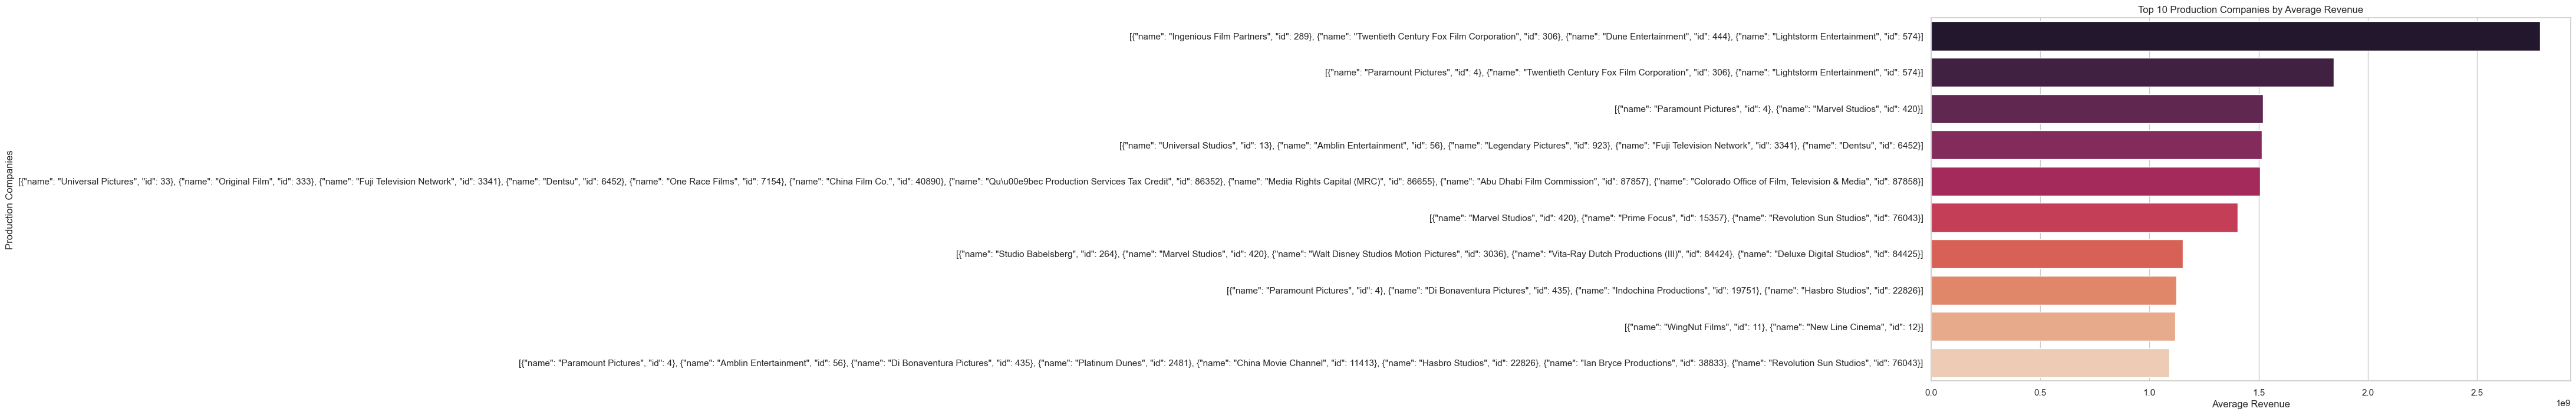

In [32]:
# Group by production_companies and calculate average revenue
top_companies = df.groupby('production_companies')['revenue'].mean().sort_values(ascending=False).head(10)

# Plotting top production companies by average revenue
plt.figure(figsize=(14, 8))  # Increase figure size
sns.barplot(x=top_companies.values, y=top_companies.index, palette="rocket")
plt.title('Top 10 Production Companies by Average Revenue')
plt.xlabel('Average Revenue')
plt.ylabel('Production Companies')

# Adjust layout to make room for labels
plt.tight_layout()
plt.show()



### Question 4: Which Actor is Associated with Higher Popularity and Profit?

Here, we’ll look at actors who consistently appear in high-popularity and profitable films.

In [ ]:
# Ensure profit column exists, calculating it if necessary
if 'profit' not in df.columns:
    df['profit'] = df['revenue'] - df['budget']

# Drop rows where 'cast', 'popularity', or 'profit' are missing, and split the cast column
df_cast = df.dropna(subset=['cast', 'popularity', 'profit']).copy()
df_cast['cast'] = df_cast['cast'].str.split('|')  # Adjust the delimiter if needed
df_cast = df_cast.explode('cast')

# Calculate average popularity and profit per actor
actor_popularity_profit = df_cast.groupby('cast').agg({'popularity': 'mean', 'profit': 'mean'}).sort_values(by='popularity', ascending=False).head(10)

# Plotting top actors by popularity and profit
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

# Popularity plot
sns.barplot(data=actor_popularity_profit, x='popularity', y=actor_popularity_profit.index, ax=ax[0], palette="viridis")
ax[0].set_title('Top 10 Actors by Popularity')
ax[0].set_xlabel('Average Popularity')
ax[0].set_ylabel('Actor')

# Profit plot
sns.barplot(data=actor_popularity_profit, x='profit', y=actor_popularity_profit.index, ax=ax[1], palette="viridis")
ax[1].set_title('Top 10 Actors by Profit')
ax[1].set_xlabel('Average Profit')
ax[1].set_ylabel('')

# Adjust layout and show plot
plt.tight_layout()
plt.show()



### Question 5: Which Year Produced the Highest Grossing Movies?

Finally, we’ll analyze movie revenue by release year.

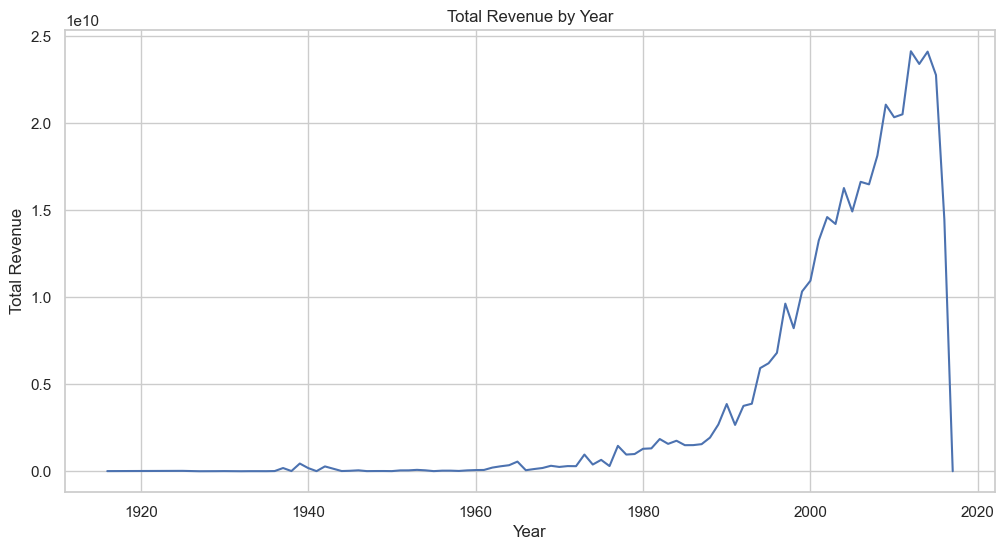

In [35]:
# Extract year from release_date and calculate total revenue by year
df['release_year'] = df['release_date'].dt.year
yearly_revenue = df.groupby('release_year')['revenue'].sum()

# Plot total revenue by year
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_revenue.index, y=yearly_revenue.values, color="b")
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

## Conclusion
In this analysis, we found:
- **Budget** has a positive correlation with **revenue** and **profit**.
- **Genres** like Action, Adventure, and Sci-Fi are associated with higher popularity.
- Certain **directors** and **actors** frequently produce high-revenue and popular films.
- Some **years** stand out in terms of box office success, possibly due to blockbuster releases.
